In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('bank-full.csv')
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [2]:
data.shape

(45211, 17)

In [3]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Check for Duplicates

In [5]:
data[data.duplicated()].shape

(0, 17)

In [6]:
data[data.duplicated()] # No Duplicate values found

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


# Outlier Detection and Cleaning

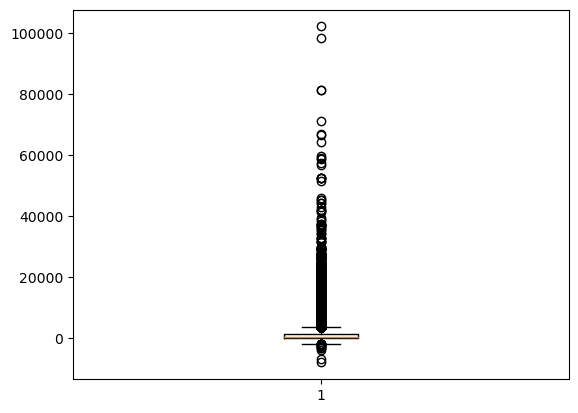

In [7]:
data_box=data.dropna()
data_box1=data_box.balance
plt.boxplot(data_box1)
plt.show()

In [8]:
data.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [9]:
# Calculate IQR
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3 - Q1

In [10]:
# Remove data points outside IQR range
data = data[~((data['balance'] < (Q1 - 1.5 * IQR)) |(data['balance'] > (Q3 + 1.5 * IQR)))]

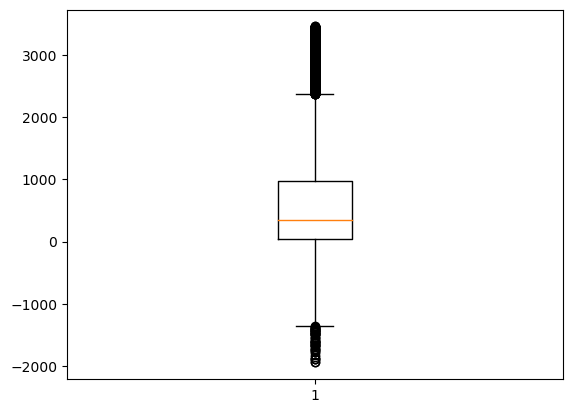

In [11]:
data_box=data.dropna()
data_box1=data_box.balance
plt.boxplot(data_box1)
plt.show()

In [12]:
data.balance.describe()

count    40482.000000
mean       640.636233
std        844.435442
min      -1944.000000
25%         46.000000
50%        349.000000
75%        980.750000
max       3462.000000
Name: balance, dtype: float64

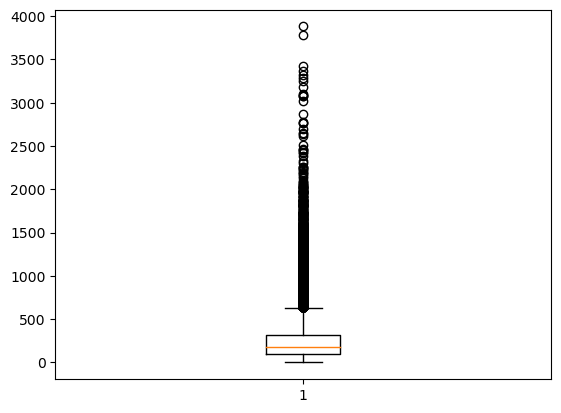

In [13]:
data_box=data.dropna()
data_box1=data_box.duration
plt.boxplot(data_box1)
plt.show()

In [14]:
data.duration.describe()

count    40482.000000
mean       256.156835
std        255.504239
min          0.000000
25%        103.000000
50%        179.000000
75%        316.000000
max       3881.000000
Name: duration, dtype: float64

In [15]:
# Calculate IQR
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1

In [16]:
# Remove data points outside IQR range
data = data[~((data['duration'] < (Q1 - 1.5 * IQR)) |(data['duration'] > (Q3 + 1.5 * IQR)))]

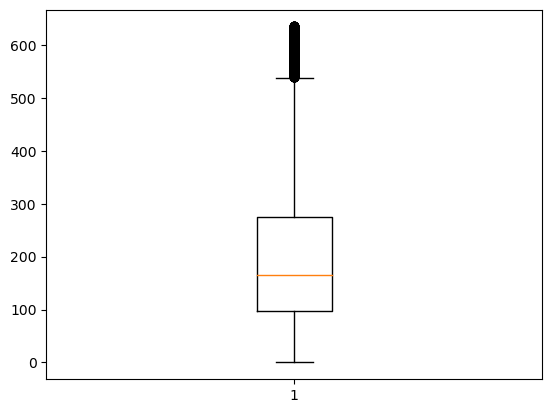

In [17]:
data_box=data.dropna()
data_box1=data_box.duration
plt.boxplot(data_box1)
plt.show()

In [18]:
data.duration.describe()

count    37572.000000
mean       201.743053
std        138.937303
min          0.000000
25%         98.000000
50%        166.000000
75%        274.250000
max        635.000000
Name: duration, dtype: float64

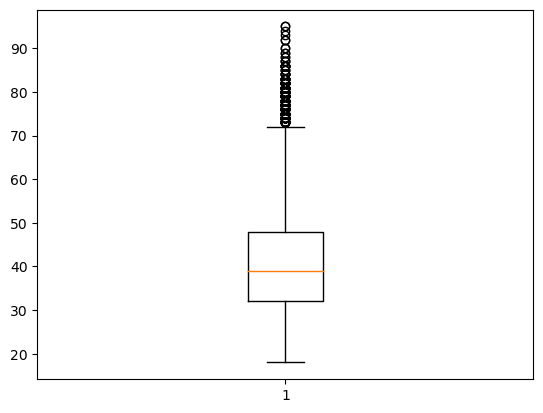

In [19]:
data_box=data.dropna()
data_box1=data_box.age
plt.boxplot(data_box1)
plt.show()

In [20]:
data.age.describe()

count    37572.000000
mean        40.634728
std         10.442249
min         18.000000
25%         32.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:>

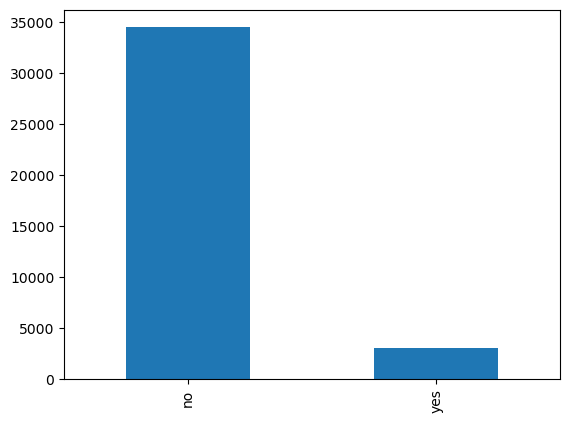

In [21]:
val_counts=data['y'].value_counts()
val_counts.plot.bar()

<AxesSubplot:>

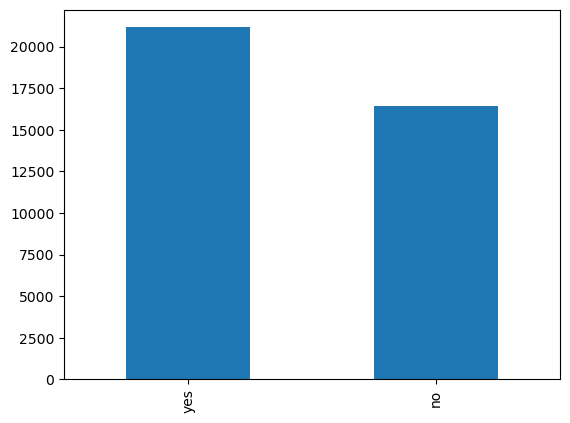

In [22]:
val_counts=data['housing'].value_counts()
val_counts.plot.bar()

<AxesSubplot:>

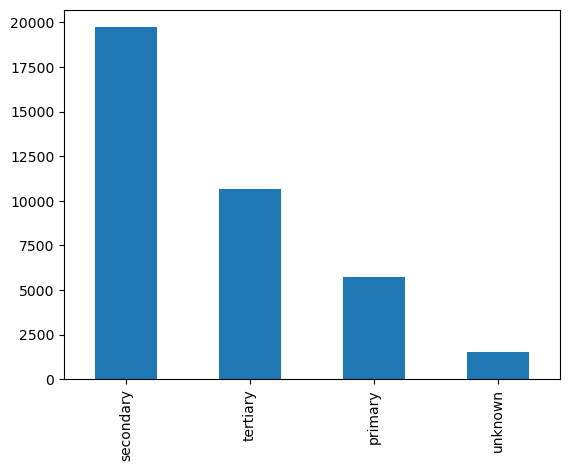

In [23]:
val_counts=data['education'].value_counts()
val_counts.plot.bar()

<AxesSubplot:>

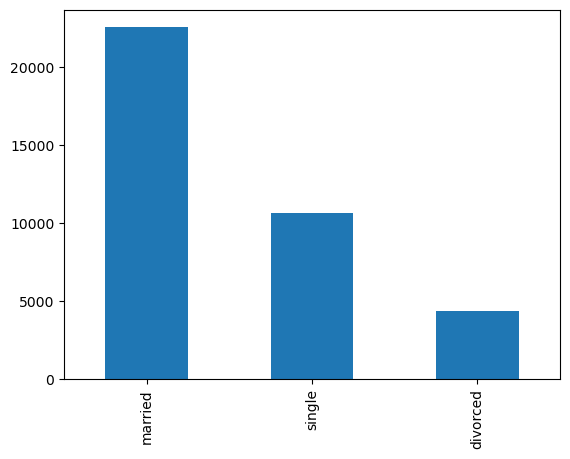

In [24]:
val_counts=data['marital'].value_counts()
val_counts.plot.bar()

<AxesSubplot:>

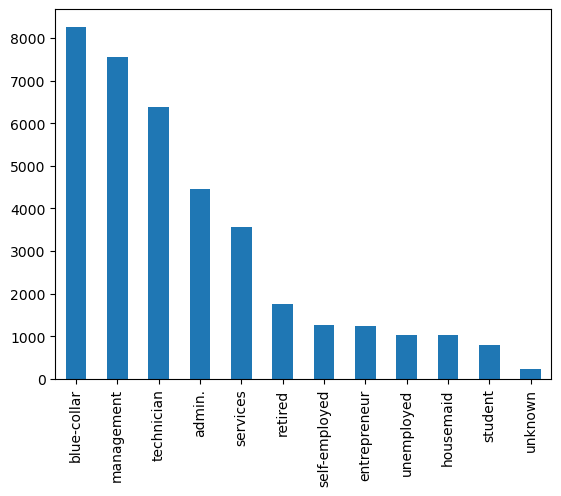

In [25]:
val_counts=data['job'].value_counts()
val_counts.plot.bar()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [27]:
# Drop any rows with missing values
data.dropna(inplace=True)

In [28]:
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [29]:
X = data.drop('y', axis=1)
y = data['y']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\thila\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred=model.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
y_test

959      0
35050    0
13591    0
25403    0
23943    0
        ..
35883    0
10514    0
28752    0
39882    0
43480    1
Name: y, Length: 7515, dtype: int32

In [35]:
df=pd.DataFrame()
df["Actual"]=y_test
df["Prediction"]=y_pred
df.reset_index(inplace=True,drop=True)
df = df.replace({0: 'no', 1: 'yes'})

In [36]:
df

,Actual,Prediction
0,no,no
1,no,no
2,no,no
3,no,no
4,no,no
...,...,...
7510,no,no
7511,no,no
7512,no,no
7513,no,no


In [37]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_pred,y_test)
print(confusion_matrix)

[[6831  573]
 [  69   42]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      7404
           1       0.07      0.38      0.12       111

    accuracy                           0.91      7515
   macro avg       0.53      0.65      0.54      7515
weighted avg       0.98      0.91      0.94      7515



<AxesSubplot:>

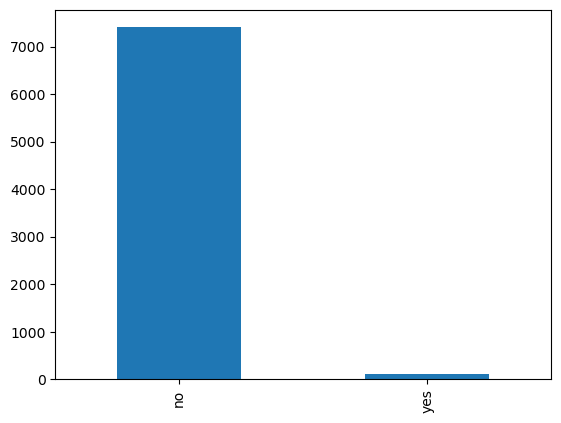

In [39]:
val_counts=df['Actual'].value_counts()
val_counts=df['Prediction'].value_counts()
val_counts.plot.bar()

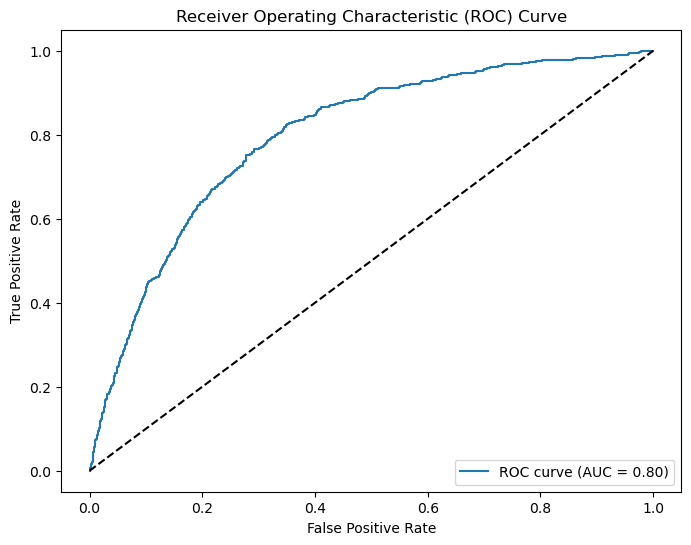

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculating ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Ploting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
